In [167]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [168]:
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2020, 5, 31)

In [169]:
date_from = "2004-01-01"
date_to = "2020-5-31"
date_range = pd.date_range(date_from, date_to, freq="D")
date_range

DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05', '2004-01-06', '2004-01-07', '2004-01-08',
               '2004-01-09', '2004-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=5996, freq='D')

In [170]:
import yfinance as yf

In [171]:
from pandas_datareader._utils import RemoteDataError
from pandas_datareader.data import Options

In [172]:
import requests
from bs4 import BeautifulSoup
import bs4

In [173]:
yf.pdr_override() 

In [174]:
data_source='google'
start_date = start
end_date = end

In [175]:
from nsepy import get_history

In [178]:
NSE = data.get_data_yahoo('^NSEI', start_date)
NSE

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2020-06-08,10326.750000,10328.500000,10120.250000,10167.450195,10167.450195,936500
2020-06-09,10181.150391,10291.150391,10021.450195,10046.650391,10046.650391,754200
2020-06-10,10072.599609,10148.750000,10036.849609,10116.150391,10116.150391,632400


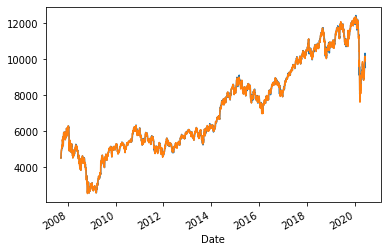

In [179]:
NSE.Open.plot()
NSE.Close.plot()
plt.show()

In [180]:
NSE_return = pd.DataFrame()

In [181]:
NSE_return = pd.DataFrame(NSE['Adj Close'].pct_change())
NSE_return

,Adj Close
Date,
2007-09-17,NaN
2007-09-18,0.011469
2007-09-19,0.040946
2007-09-20,0.003212
2007-09-21,0.018957
...,...
2020-06-08,0.002495
2020-06-09,-0.011881
2020-06-10,0.006918


In [182]:
NSE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3.108000e+03
mean,7254.959429,7299.863001,7198.701042,7249.641959,7249.641959,1.332130e+05
std,2468.971143,2467.369152,2464.069116,2464.848221,2464.848221,1.718735e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5275.812622,5315.124878,5233.187622,5274.850098,5274.850098,0.000000e+00
50%,6273.875000,6306.100098,6233.074951,6274.274902,6274.274902,1.257000e+05
75%,9047.587646,9107.512451,8913.512207,8993.062256,8993.062256,1.957000e+05
max,12430.500000,12430.500000,12321.400391,12362.299805,12362.299805,1.811000e+06


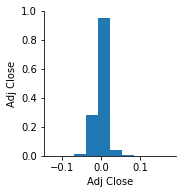

In [183]:
sns.pairplot(NSE_return)

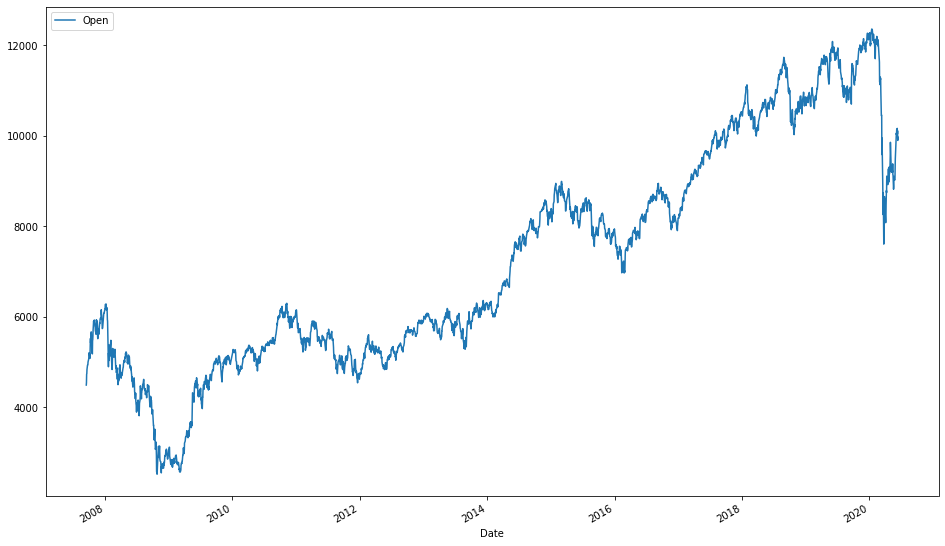

In [184]:
NSE['Close'].plot(figsize=(16,10),label=tick)
plt.legend()

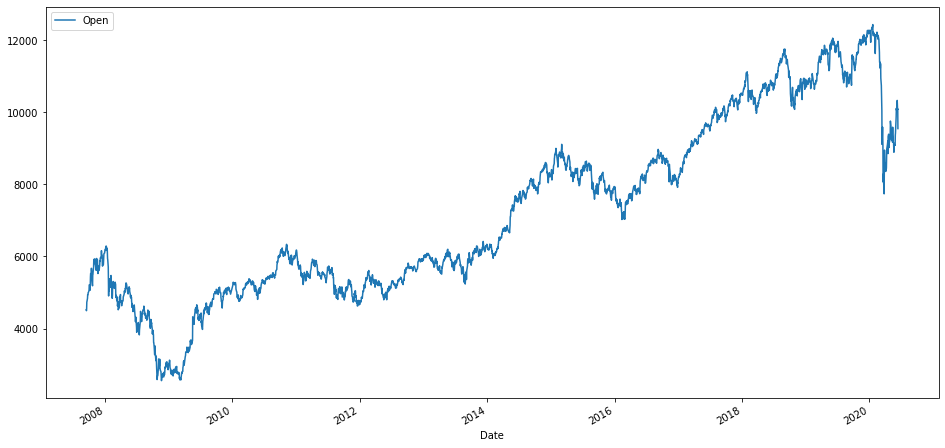

In [185]:
NSE['Open'].plot(figsize=(16,8),label=tick)
plt.legend()

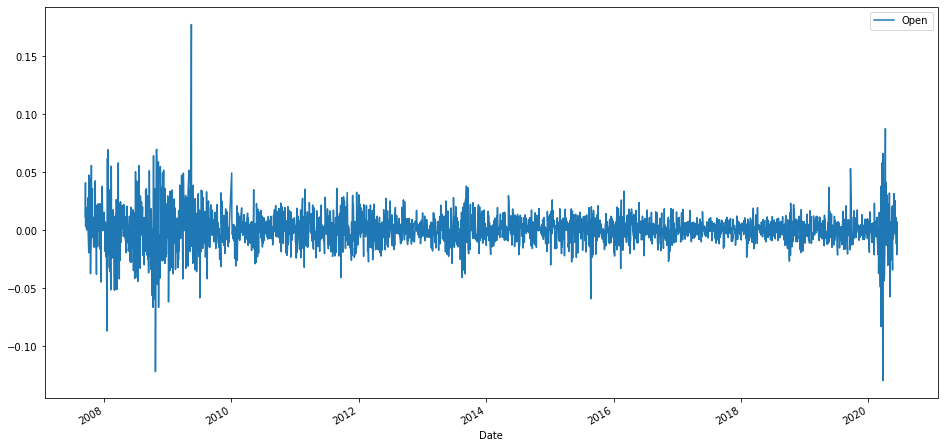

In [186]:
NSE_return['Adj Close'].plot(figsize=(16,8),label=tick)
plt.legend()

In [187]:
forecast_out = 30
NSE['Prediction'] = NSE[['Adj Close']].shift(-forecast_out)
print(NSE)

                    Open          High           Low         Close  \
Date                                                                 
2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...                  ...           ...           ...           ...   
2020-06-08  10326.750000  10328.500000  10120.250000  10167.450195   
2020-06-09  10181.150391  10291.150391  10021.450195  10046.650391   
2020-06-10  10072.599609  10148.750000  10036.849609  10116.150391   
2020-06-11  10094.099609  10112.049805   9885.049805   9902.000000   
2020-06-12   9544.950195   9996.049805   9544.349609   9972.900391   

               Adj Close  Volume   Prediction  
Date                                     

In [188]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(NSE.drop(['Prediction'],1))
#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[  4518.45019531   4549.04980469   4482.85009766   4494.64990234
    4494.64990234      0.        ]
 [  4494.10009766   4551.79980469   4481.54980469   4546.20019531
    4546.20019531      0.        ]
 [  4550.25         4739.           4550.25         4732.35009766
    4732.35009766      0.        ]
 ...
 [  9259.70019531   9377.09960938   9250.34960938   9282.29980469
    9282.29980469 512800.        ]
 [  9389.79980469   9404.40039062   9260.           9380.90039062
    9380.90039062 614500.        ]
 [  9408.59960938   9599.84960938   9392.34960938   9553.34960938
    9553.34960938 653000.        ]]


In [189]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(NSE['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[ 5868.75        5900.64990234  5866.45019531 ... 10116.15039062
  9902.          9972.90039062]


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [192]:
lm = LinearRegression()

In [193]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
X_train

array([[  7636.04980469,   7663.        ,   7515.5       ,
          7558.20019531,   7558.20019531, 165100.        ],
       [  8600.20019531,   8689.40039062,   8590.15039062,
          8683.15039062,   8683.15039062, 157900.        ],
       [  6729.5       ,   6732.25      ,   6675.45019531,
          6721.04980469,   6721.04980469, 177800.        ],
       ...,
       [  5708.64990234,   5732.14990234,   5669.        ,
          5688.70019531,   5688.70019531, 154600.        ],
       [  6261.75      ,   6307.45019531,   6243.35009766,
          6303.95019531,   6303.95019531, 122100.        ],
       [  5755.79980469,   5803.14990234,   5753.89990234,
          5787.64990234,   5787.64990234,      0.        ]])

In [195]:
print(lm.intercept_)

108.9055932238598


In [196]:
lm_confidence = lm.score(X_test, y_test)
print("lm confidence: ", lm_confidence)

lm confidence:  0.9583228992615485


In [197]:
X_forecast = np.array(NSE.drop(['Prediction'],1))[-forecast_out:]
print(X_forecast)

[[  9753.5          9889.04980469   9731.5          9859.90039062
    9859.90039062 931200.        ]
 [  9533.5          9533.5          9266.95019531   9293.5
    9293.5        687500.        ]
 [  9429.40039062   9450.90039062   9190.75         9205.59960938
    9205.59960938 725200.        ]
 [  9226.79980469   9346.90039062   9116.5          9270.90039062
    9270.90039062 722200.        ]
 [  9234.04980469   9277.84960938   9175.90039062   9199.04980469
    9199.04980469 708700.        ]
 [  9376.95019531   9382.65039062   9238.20019531   9251.5
    9251.5        609100.        ]
 [  9348.15039062   9439.90039062   9219.95019531   9239.20019531
    9239.20019531 704600.        ]
 [  9168.84960938   9240.84960938   9043.95019531   9196.54980469
    9196.54980469 805500.        ]
 [  9584.20019531   9584.5          9351.09960938   9383.54980469
    9383.54980469 846400.        ]
 [  9213.95019531   9281.09960938   9119.75         9142.75
    9142.75       602600.        ]
 [  9182.4

In [198]:
lm_prediction = lm.predict(X_forecast)
print(lm_prediction)

[ 9650.75694947  9220.31994623  9135.30292073  9147.30395542
  9061.43083097  9154.83699859  9186.86433948  9007.34121402
  9237.58326323  9081.26610459  8997.3974802   8774.09477476
  8774.34262263  8989.54598451  9014.89340057  8941.68391493
  8944.66609449  9193.36095653  9312.48615881  9366.77158406
  9734.84242774  9802.06616088  9918.149046    9875.85541832
  9894.08063544  9964.88204252 10001.60392872  9982.10235148
  9809.99874497  9919.35188619]


In [209]:
pred = pd.DataFrame(lm_prediction)

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

In [ ]:
sns.distplot(y_test - predictions)

In [200]:
from sklearn import metrics

In [201]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 354.4429628733867


In [202]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 256373.6842116671


In [203]:
print(X_test, [predictions[i] for i in range(len(predictions)-1, len(predictions)-6,-1)])
print(y_test)

[[ 12266.45019531  12293.90039062  12252.75        12271.79980469
   12271.79980469 810700.        ]
 [  7673.35009766   7674.95019531   7556.60009766   7568.29980469
    7568.29980469 188900.        ]
 [  8515.75         8571.40039062   8500.70019531   8565.
    8565.         153900.        ]
 ...
 [  7924.25         7957.70019531   7874.5          7948.89990234
    7948.89990234 210700.        ]
 [  5233.54980469   5238.70019531   5197.5          5205.10009766
    5205.10009766      0.        ]
 [  7436.10009766   7539.           7424.29980469   7531.79980469
    7531.79980469 245100.        ]] [7541.688800910241, 5291.747992857006, 7938.07790538407, 10603.223720251284, 8581.912013144283]
[11707.90039062  7210.75        8607.45019531 ...  7837.54980469
  5225.70019531  7979.89990234]


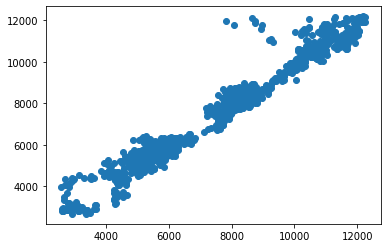

In [204]:
plt.scatter(y_test, predictions)

<Figure size 432x288 with 0 Axes>

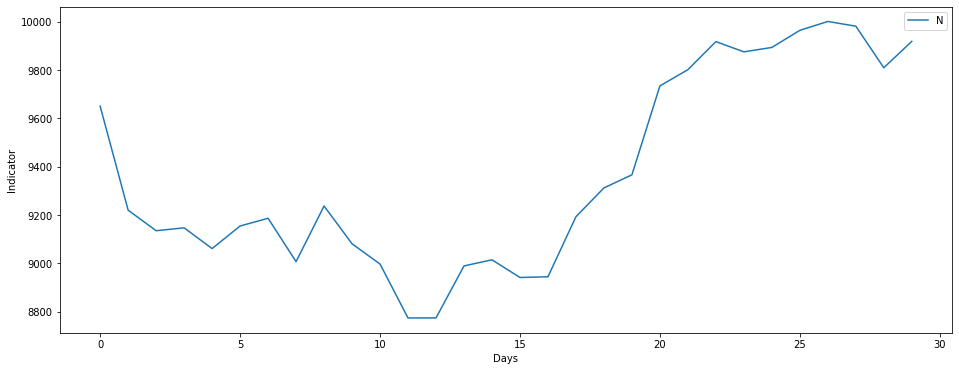

In [228]:
fig = plt.figure()
pred.plot(figsize=(16,6),label=tick)
plt.xlabel('Days')
plt.ylabel('Indicator')
plt.legend('NSE')

In [213]:
NSE_out = pd.merge(NSE,pred,how = 'left',left_index = True, right_index = True)

In [214]:
NSE_out

,Open,High,Low,Close,Adj Close,Volume,Prediction,0
Date,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,5868.750000,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,5900.649902,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,5866.450195,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,5932.399902,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,5847.299805,NaN
...,...,...,...,...,...,...,...,...
2020-06-08,10326.750000,10328.500000,10120.250000,10167.450195,10167.450195,936500,NaN,NaN
2020-06-09,10181.150391,10291.150391,10021.450195,10046.650391,10046.650391,754200,NaN,NaN
2020-06-10,10072.599609,10148.750000,10036.849609,10116.150391,10116.150391,632400,NaN,NaN
